# Softmax exercise

*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

This exercise is analogous to the SVM exercise. You will:

- implement a fully-vectorized **loss function** for the Softmax classifier
- implement the fully-vectorized expression for its **analytic gradient**
- **check your implementation** with numerical gradient
- use a validation set to **tune the learning rate and regularization** strength
- **optimize** the loss function with **SGD**
- **visualize** the final learned weights


In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the linear classifier. These are the same steps as we used for the
    SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    mask = np.random.choice(num_training, num_dev, replace=False)
    X_dev = X_train[mask]
    y_dev = y_train[mask]
    
    # Preprocessing: reshape the image data into rows
    X_train = np.reshape(X_train, (X_train.shape[0], -1))
    X_val = np.reshape(X_val, (X_val.shape[0], -1))
    X_test = np.reshape(X_test, (X_test.shape[0], -1))
    X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
    
    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis = 0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image
    X_dev -= mean_image
    
    # add bias dimension and transform into columns
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
    X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
    
    return X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)
print('dev data shape: ', X_dev.shape)
print('dev labels shape: ', y_dev.shape)

Train data shape:  (49000, 3073)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3073)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3073)
Test labels shape:  (1000,)
dev data shape:  (500, 3073)
dev labels shape:  (500,)


## Softmax Classifier

Your code for this section will all be written inside **cs231n/classifiers/softmax.py**. 


In [12]:
from cs231n.classifiers.softmax import softmax_loss_naive
from cs231n.classifiers.softmax import softmax_loss_vectorized

In [3]:
# First implement the naive softmax loss function with nested loops.
# Open the file cs231n/classifiers/softmax.py and implement the
# softmax_loss_naive function.

import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

Test
loss: 2.327567
sanity check: 2.302585


## Inline Question 1:
Why do we expect our loss to be close to -log(0.1)? Explain briefly.**

**Your answer:** *Fill this in*


In [30]:
# Complete the implementation of softmax_loss_naive and implement a (naive)
# version of the gradient that uses nested loops.
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# As we did for the SVM, use numeric gradient checking as a debugging tool.
# The numeric gradient should be close to the analytic gradient.
from cs231n.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 20)

# similar to SVM case, do another gradient check with regularization
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 20)

Test


KeyboardInterrupt: 

In [33]:
# similar to SVM case, do another gradient check with regularization
loss, grad = softmax_loss_vectorized(W, X_dev, y_dev, 0)
f = lambda w: softmax_loss_vectorized(w, X_dev, y_dev, 0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: -0.122730 analytic: -0.122730, relative error: 1.618643e-07
numerical: -0.011118 analytic: -0.011118, relative error: 3.140105e-06
numerical: 0.804930 analytic: 0.804930, relative error: 1.669996e-09
numerical: -1.467934 analytic: -1.467934, relative error: 7.923331e-09
numerical: 0.751231 analytic: 0.751231, relative error: 3.919346e-08
numerical: 0.000635 analytic: 0.000635, relative error: 6.714847e-05
numerical: 0.221358 analytic: 0.221358, relative error: 2.070731e-07
numerical: 1.395881 analytic: 1.395881, relative error: 9.924403e-09
numerical: 0.292291 analytic: 0.292291, relative error: 2.581070e-08
numerical: -1.287130 analytic: -1.287130, relative error: 3.117381e-08


In [34]:
# Complete the implementation of softmax_loss_naive and implement a (naive)
# version of the gradient that uses nested loops.
tic = time.time()
loss, grad = softmax_loss_vectorized(W, X_dev, y_dev, 0.0)
print(time.time()-tic)

0.0035097599029541016


In [35]:
# Now that we have a naive implementation of the softmax loss function and its gradient,
# implement a vectorized version in softmax_loss_vectorized.
# The two versions should compute the same results, but the vectorized version should be
# much faster.
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from cs231n.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

# As we did for the SVM, we use the Frobenius norm to compare the two versions
# of the gradient.
grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

Test
naive loss: 2.327567e+00 computed in 12.374160s
vectorized loss: 2.327567e+00 computed in 0.003008s
Loss difference: 0.000000
Gradient difference: 0.000000


### Smoke test

iteration 0 / 50000: loss 777.065639
iteration 1000 / 50000: loss 763.472353
iteration 2000 / 50000: loss 756.374129
iteration 3000 / 50000: loss 750.952523
iteration 4000 / 50000: loss 746.150627
iteration 5000 / 50000: loss 742.254986
iteration 6000 / 50000: loss 738.329988
iteration 7000 / 50000: loss 734.972597
iteration 8000 / 50000: loss 731.839834
iteration 9000 / 50000: loss 728.953765
iteration 10000 / 50000: loss 726.225250
iteration 11000 / 50000: loss 723.663935
iteration 12000 / 50000: loss 721.399200
iteration 13000 / 50000: loss 719.107626
iteration 14000 / 50000: loss 716.782887
iteration 15000 / 50000: loss 714.827802
iteration 16000 / 50000: loss 712.564630
iteration 17000 / 50000: loss 710.890697
iteration 18000 / 50000: loss 708.860945
iteration 19000 / 50000: loss 707.139210
iteration 20000 / 50000: loss 705.496214
iteration 21000 / 50000: loss 703.754342
iteration 22000 / 50000: loss 702.276216
iteration 23000 / 50000: loss 700.569258
iteration 24000 / 50000: loss

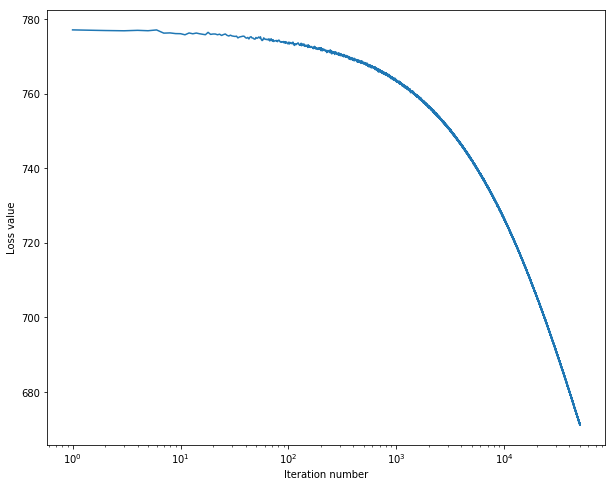

In [43]:
svm = Softmax()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4, num_iters=50000, verbose=True)
toc = time.time()
#print('That took %fs' % (toc - tic))

# A useful debugging strategy is to plot the loss as a function of
# iteration number:
plt.semilogx(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [ ]:
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of over 0.35 on the validation set.
from cs231n.classifiers import Softmax
results = {}
best_val = -1
best_softmax = None
learning_rates = [-6, -4]
regularization_strengths = [1e4, 1e5]

################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained softmax classifer in best_softmax.                          #
################################################################################
leRange = np.logspace(learning_rates[0],learning_rates[1], 10)
reRange = np.linspace(regularization_strengths[0],regularization_strengths[1], 10)

for le in leRange:
    for reg in reRange:
        print('Learning rate is %4.2e, regularization is %4.2e' % (le, reg))
        svm = Softmax()
        svm.train(X_train, y_train, learning_rate=le, reg=reg, num_iters=10000)
        
        y_train_pred = svm.predict(X_train)
        train_acc = np.mean(y_train == y_train_pred)
        
        y_val_pred = svm.predict(X_val)
        val_acc = np.mean(y_val == y_val_pred)
        
        print(f'Train accuracy is {train_acc:.4f}, validation accuracy is {val_acc:.4f}')
        print('\n')
        
        results.update({(le,reg):(train_acc,val_acc)})
        
        
        if val_acc > best_val:
            best_val = val_acc
            best_svm = svm
                
print('best validation accuracy achieved during cross-validation: %f' % best_val)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
    
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

Learning rate is 1.00e-06, regularization is 1.00e+04
Train accuracy is 0.4193, validation accuracy is 0.3660


Learning rate is 1.00e-06, regularization is 2.00e+04
Train accuracy is 0.4213, validation accuracy is 0.3830


Learning rate is 1.00e-06, regularization is 3.00e+04
Train accuracy is 0.4254, validation accuracy is 0.3770


Learning rate is 1.00e-06, regularization is 4.00e+04
Train accuracy is 0.4223, validation accuracy is 0.3850


Learning rate is 1.00e-06, regularization is 5.00e+04
Train accuracy is 0.4228, validation accuracy is 0.3580


Learning rate is 1.00e-06, regularization is 6.00e+04
Train accuracy is 0.4226, validation accuracy is 0.3830


Learning rate is 1.00e-06, regularization is 7.00e+04
Train accuracy is 0.4206, validation accuracy is 0.3810


Learning rate is 1.00e-06, regularization is 8.00e+04
Train accuracy is 0.4247, validation accuracy is 0.3940


Learning rate is 1.00e-06, regularization is 9.00e+04
Train accuracy is 0.4217, validation accuracy is 0

Train accuracy is 0.3234, validation accuracy is 0.2750


Learning rate is 3.59e-05, regularization is 5.00e+04
Train accuracy is 0.3118, validation accuracy is 0.2920


Learning rate is 3.59e-05, regularization is 6.00e+04
Train accuracy is 0.3551, validation accuracy is 0.3130


Learning rate is 3.59e-05, regularization is 7.00e+04
Train accuracy is 0.3190, validation accuracy is 0.2770


Learning rate is 3.59e-05, regularization is 8.00e+04
Train accuracy is 0.2940, validation accuracy is 0.2650


Learning rate is 3.59e-05, regularization is 9.00e+04
Train accuracy is 0.3268, validation accuracy is 0.3210


Learning rate is 3.59e-05, regularization is 1.00e+05
Train accuracy is 0.3043, validation accuracy is 0.2880


Learning rate is 5.99e-05, regularization is 1.00e+04
Train accuracy is 0.3263, validation accuracy is 0.3150


Learning rate is 5.99e-05, regularization is 2.00e+04


In [ ]:
Learning rate is 4.64e-06, regularization is 1.00e+05
Train accuracy is 0.4392, validation accuracy is 0.4020

Learning rate is 2.78e-06, regularization is 7.00e+04
Train accuracy is 0.4419, validation accuracy is 0.4020

Learning rate is 1.67e-06, regularization is 1.00e+05
Train accuracy is 0.4275, validation accuracy is 0.4060

In [ ]:
# evaluate on test set
# Evaluate the best softmax on test set
y_test_pred = best_softmax.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('softmax on raw pixels final test set accuracy: %f' % (test_accuracy, ))

In [ ]:
# Visualize the learned weights for each class
w = best_softmax.W[:-1,:] # strip out the bias
w = w.reshape(32, 32, 3, 10)

w_min, w_max = np.min(w), np.max(w)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(2, 5, i + 1)
    
    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])